In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the file
file_path = r"C:\Users\pooja\OneDrive\Desktop\Business_Analyst__Insurance_Billing_-_CANDIDATE_DATASET.xlsx"  # Update this to your actual file path
dfs = pd.read_excel(file_path, sheet_name=None)

# Access DataFrames by sheet name
df_kit = dfs['KIT']
df_clinic = dfs['CLINIC']
df_physician = dfs['PHYSICIAN']

# Print each DataFrame to check the data
print("Data from 'KIT' sheet:")
print(df_kit.head())  

print("\nData from 'Clinic' sheet:")
print(df_clinic.head())

print("\nData from 'Physician' sheet:")
print(df_physician.head())

Data from 'KIT' sheet:
    KITID DATE_OF_SERVICE RECEIVED_DATE CARRIER  ORDERING_CLINIC_ID  \
0  600000      2021-01-01    2021-01-04   FEDEX                1001   
1  600001      2021-04-01    2021-04-03     UPS                1002   
2  600002      2021-07-01    2021-07-03   FEDEX                1003   
3  600003      2021-10-01    2021-10-04   FEDEX                1004   
4  600004      2021-02-01    2021-02-05   FEDEX                1004   

   ORDERING_PHYSICIAN_ID  
0                   4501  
1                   4502  
2                   4503  
3                   4504  
4                   4505  

Data from 'Clinic' sheet:
   CLINIC_ID      CLINIC_NAME     CLINIC_ADDRESS_1  CLINIC_CITY  CLINIC_ZIP  \
0       1001   House Atreides  789 Ocean View Road      Caladan       78644   
1       1002    Loyal to You   790 Ocean View Road      Caladan       78644   
2       1003  House Harkonnen       456 Baron Lane  Giedi Prime       78641   
3       1004           Fremen     123 Dessert

In [6]:
# Check for missing values and handle them
print(df_kit.isnull().sum())
print(df_clinic.isnull().sum())
print(df_physician.isnull().sum())

KITID                    0
DATE_OF_SERVICE          0
RECEIVED_DATE            0
CARRIER                  0
ORDERING_CLINIC_ID       0
ORDERING_PHYSICIAN_ID    0
dtype: int64
CLINIC_ID           0
CLINIC_NAME         0
CLINIC_ADDRESS_1    0
CLINIC_CITY         0
CLINIC_ZIP          0
CLINIC_STATE        0
dtype: int64
PHYSICIAN_ID            0
PHYSICIAN_FIRST_NAME    0
PHYSICIAN_LAST_NAME     0
CREDENTIALS             0
NPI_NUMBER              0
dtype: int64


In [7]:
# Convert DATE_OF_SERVICE and RECEIVED_DATE to datetime format in df_kit
df_kit['DATE_OF_SERVICE'] = pd.to_datetime(df_kit['DATE_OF_SERVICE'])
df_kit['RECEIVED_DATE'] = pd.to_datetime(df_kit['RECEIVED_DATE'])

In [8]:
# Check data types to confirm changes
print(df_kit.dtypes)

KITID                             int64
DATE_OF_SERVICE          datetime64[ns]
RECEIVED_DATE            datetime64[ns]
CARRIER                          object
ORDERING_CLINIC_ID                int64
ORDERING_PHYSICIAN_ID             int64
dtype: object


In [9]:
# Merge KIT data with CLINIC data
df_kit_clinic = pd.merge(df_kit, df_clinic, left_on='ORDERING_CLINIC_ID', right_on='CLINIC_ID', how='left')

# Merge the above result with PHYSICIAN data
df_full = pd.merge(df_kit_clinic, df_physician, left_on='ORDERING_PHYSICIAN_ID', right_on='PHYSICIAN_ID', how='left')

# Check the first few rows to verify the merge
print(df_full.head())

    KITID DATE_OF_SERVICE RECEIVED_DATE CARRIER  ORDERING_CLINIC_ID  \
0  600000      2021-01-01    2021-01-04   FEDEX                1001   
1  600001      2021-04-01    2021-04-03     UPS                1002   
2  600002      2021-07-01    2021-07-03   FEDEX                1003   
3  600003      2021-10-01    2021-10-04   FEDEX                1004   
4  600004      2021-02-01    2021-02-05   FEDEX                1004   

   ORDERING_PHYSICIAN_ID  CLINIC_ID      CLINIC_NAME     CLINIC_ADDRESS_1  \
0                   4501       1001   House Atreides  789 Ocean View Road   
1                   4502       1002    Loyal to You   790 Ocean View Road   
2                   4503       1003  House Harkonnen       456 Baron Lane   
3                   4504       1004           Fremen     123 Dessert Road   
4                   4505       1004           Fremen     123 Dessert Road   

   CLINIC_CITY  CLINIC_ZIP CLINIC_STATE  PHYSICIAN_ID PHYSICIAN_FIRST_NAME  \
0      Caladan       78644      

In [10]:
# Descriptive statistics
print(df_full.describe())

               KITID  ORDERING_CLINIC_ID  ORDERING_PHYSICIAN_ID    CLINIC_ID  \
count      11.000000           11.000000              11.000000    11.000000   
mean   600005.000000         1002.181818            4506.000000  1002.181818   
std         3.316625            1.167748               3.316625     1.167748   
min    600000.000000         1001.000000            4501.000000  1001.000000   
25%    600002.500000         1001.000000            4503.500000  1001.000000   
50%    600005.000000         1002.000000            4506.000000  1002.000000   
75%    600007.500000         1003.000000            4508.500000  1003.000000   
max    600010.000000         1004.000000            4511.000000  1004.000000   

         CLINIC_ZIP  PHYSICIAN_ID    NPI_NUMBER  
count     11.000000     11.000000  1.100000e+01  
mean   78658.000000   4506.000000  6.554924e+09  
std       32.652718      3.316625  3.014213e+09  
min    78641.000000   4501.000000  1.161351e+09  
25%    78644.000000   4503.50

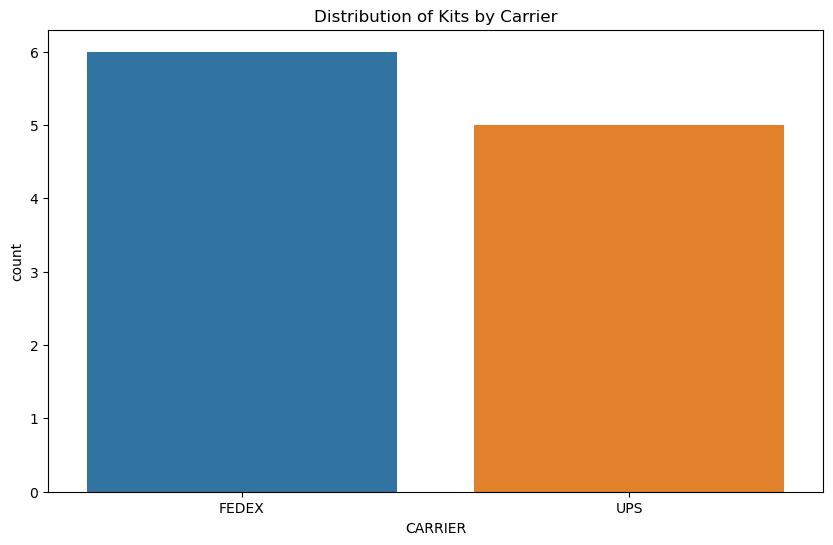

In [11]:
# Distribution of KITS per CARRIER
plt.figure(figsize=(10, 6))
sns.countplot(x='CARRIER', data=df_full)
plt.title('Distribution of Kits by Carrier')
plt.show()

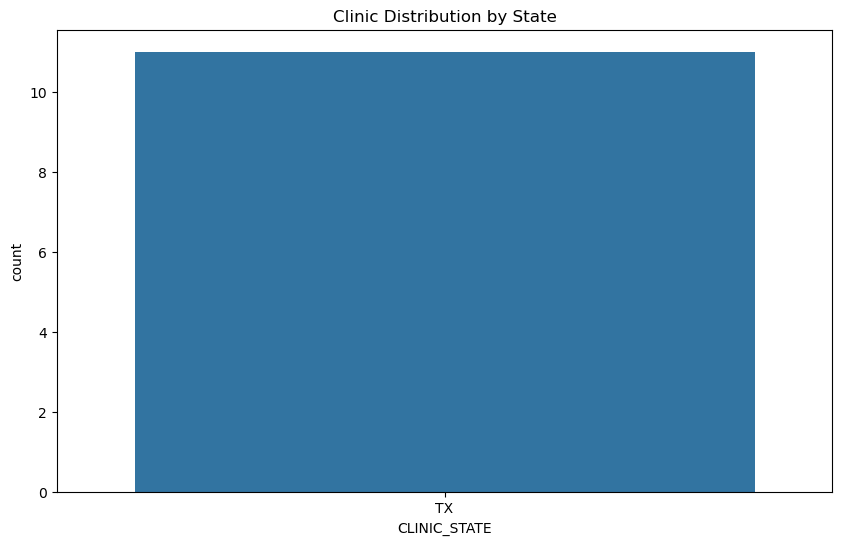

In [12]:
# Clinic distribution by state
plt.figure(figsize=(10, 6))
sns.countplot(x='CLINIC_STATE', data=df_full)
plt.title('Clinic Distribution by State')
plt.show()


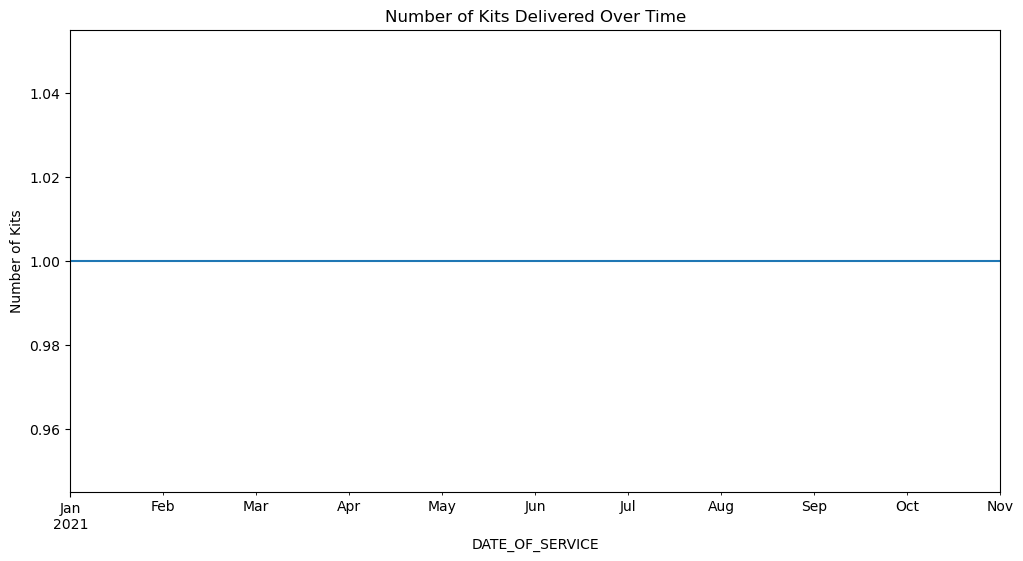

In [13]:
# Timeline of Kit deliveries
plt.figure(figsize=(12, 6))
df_full.set_index('DATE_OF_SERVICE')['KITID'].resample('M').count().plot()
plt.title('Number of Kits Delivered Over Time')
plt.ylabel('Number of Kits')
plt.show()

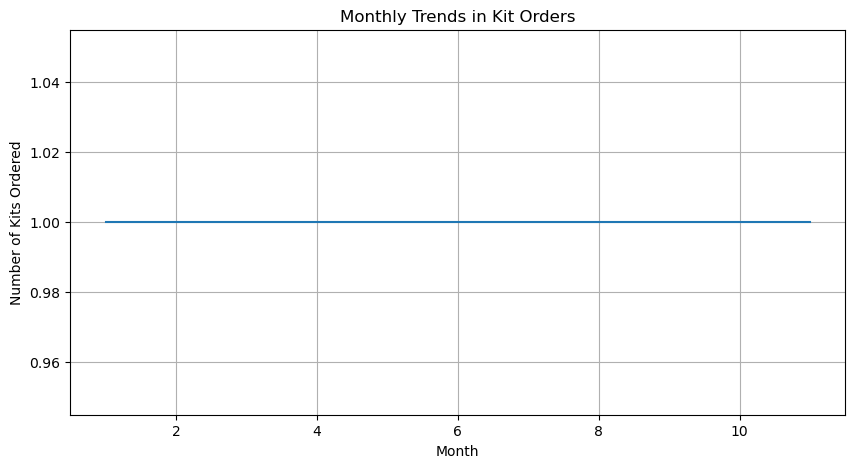

In [15]:
# Time series analysis
df_full['MONTH'] = df_full['DATE_OF_SERVICE'].dt.month
monthly_trends = df_full.groupby('MONTH').agg({'KITID': 'count'}).rename(columns={'KITID': 'TOTAL_KITS'})

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trends, x='MONTH', y='TOTAL_KITS')
plt.title('Monthly Trends in Kit Orders')
plt.ylabel('Number of Kits Ordered')
plt.xlabel('Month')
plt.grid(True)
plt.show()

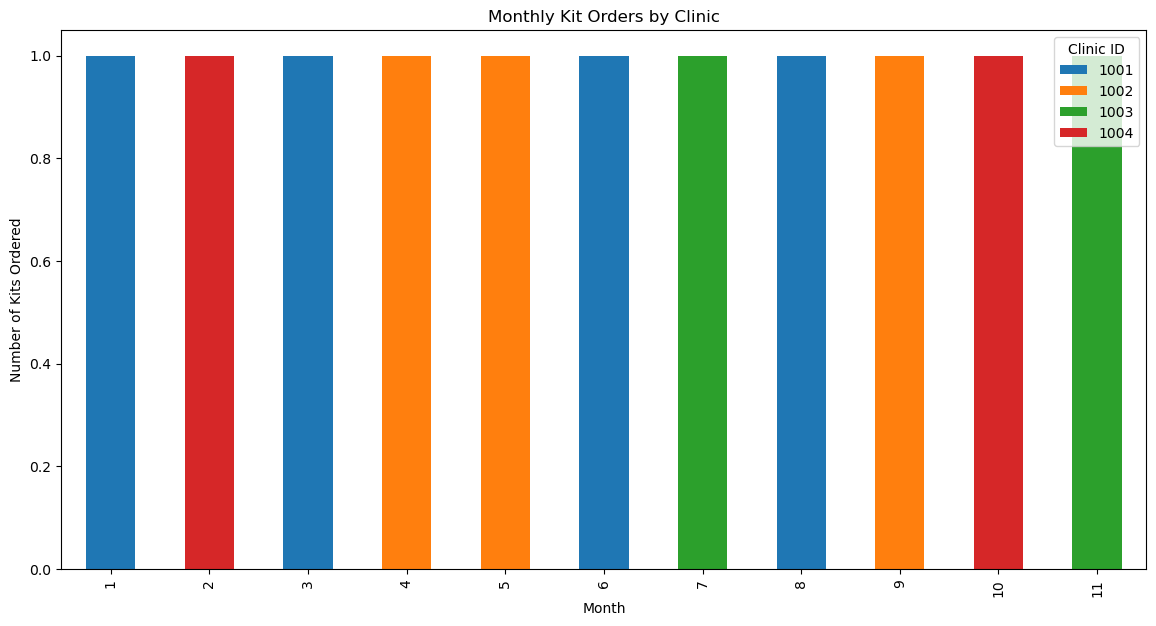

In [16]:
#advanced analysis
clinic_orders = df_full.groupby([df_full['DATE_OF_SERVICE'].dt.month, 'CLINIC_ID'])['KITID'].count().unstack()
clinic_orders.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Monthly Kit Orders by Clinic')
plt.xlabel('Month')
plt.ylabel('Number of Kits Ordered')
plt.legend(title='Clinic ID')
plt.show()


In [19]:
df_full['DATE_OF_SERVICE'] = pd.to_datetime(df_full['DATE_OF_SERVICE'])
df_full['RECEIVED_DATE'] = pd.to_datetime(df_full['RECEIVED_DATE'])
df_full['DAYS_TO_RECEIVE'] = (df_full['RECEIVED_DATE'] - df_full['DATE_OF_SERVICE']).dt.days

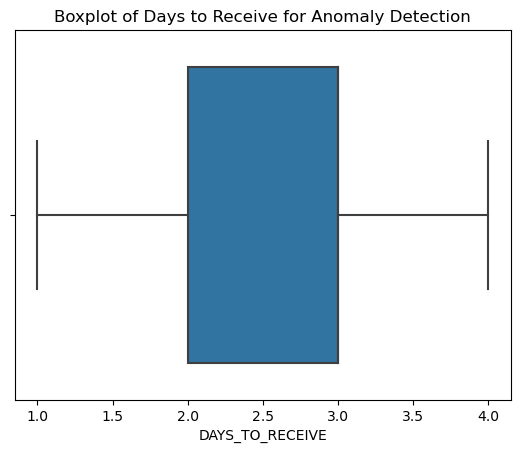

In [20]:
sns.boxplot(x=df_full['DAYS_TO_RECEIVE'])
plt.title('Boxplot of Days to Receive for Anomaly Detection')
plt.show()